In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# The SSH Model

<br>

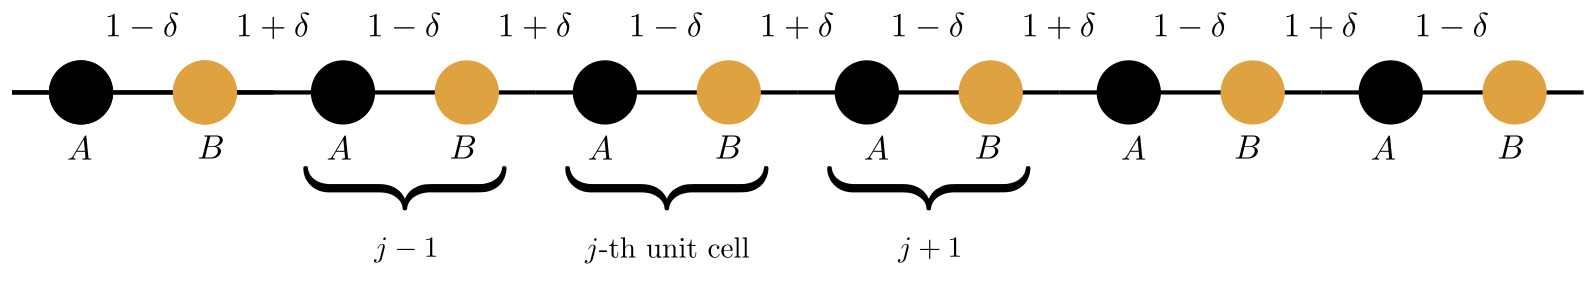

The SSH model with $N$ unit cells is defined as:
$$H_\text{SSH} = \sum_{j = 0}^{N-1} (1-\delta)c_{A,j}^\dagger c_{B,j} + (1+\delta) c_{B,j}^\dagger c_{A,j+1} + \text{h.c.}$$

#### Question 3

Without exploiting translational invariance, we can still diagonalize the SSH Hamiltonian using the standard method to diagonalize quadratic fermionic Hamiltonian. Since $H_\text{SSH}$ only involves terms of the form $c_i^\dagger c_j$, the procedure is even simpler as we don't have to put the Hamiltonian in the form that has the correct symmetries. We can write:

$$H_\text{SSH} = c^\dagger M c$$
with
$$c = \begin{pmatrix}
c_{A,1} \\
c_{B,1} \\
c_{A,2} \\
\vdots \\
c_{B,N-1}
\end{pmatrix}$$
and
$$M = \begin{pmatrix}
0 & 1 - \delta &  &  &  &  & 1 + \delta \\
1 - \delta & 0 & 1 + \delta &  &  &  &  \\
 & 1+\delta & 0 & 1 - \delta &  &  &  \\
 &  & 1 - \delta & \ddots & \ddots &  & \\
 &  &  & \ddots & \ddots & 1 + \delta &  \\
 &  &  &  & 1 + \delta & 0 & 1-\delta \\
1 + \delta &  &  & &  & 1-\delta & 0
\end{pmatrix}$$

Then, since $M$ is hermitian, we can diagonalize it in an orthogonal basis: $M = U^\dagger \Lambda U$, so that $H_\text{SSH} = c^\dagger U^\dagger \Lambda U c$. We define new operators $d = Uc$ (or equivalently $d_i = \sum_j U_{ij} c_j$), and as a consequence get $d^\dagger = c^\dagger U^\dagger$ (or equivalently $d_j^\dagger = \sum_i c_i^\dagger (U^\dagger)_{ij} = \sum_i U_{ji}^* c_i^\dagger$). We can show that those $d$ satisfy the fermionic anticommutation relations, and thus define fermionic creation and annihilation operators:

\begin{align}
\{d_i, d_j^\dagger\} &= \left\{\sum_k U_{ik} c_k, \sum_p c_p^\dagger (U^\dagger)_{pj} \right\} \\
&= \sum_{k,p} U_{ik} (U^\dagger)_{pj} \left\{c_k, c_p^\dagger \right\} \\
&= \sum_{k,p} U_{ik} (U^\dagger)_{pj} \delta_{kp} \\
&= \sum_{k} U_{ik} (U^\dagger)_{kj} \\
&= \left(U U^\dagger \right)_{ij} \\
&= \delta_{ij}
\end{align}

We can also easily show that $\{d_i, d_j\} = 0$. Using those fermionic operators, the Hamiltonian now writes $H_\text{SSH} = d^\dagger \Lambda d$, or more explicitly:

$$H_\text{SSH} = \sum_k \lambda_k d_k^\dagger d_k$$

So we can obtain the eigenmodes from diagonalizing the matrix $M$. This can easily be done with the function `np.linalg.eigh` as we do in the following (`eigh` diagonalizes symmetric matrices with a more efficient algorithm than `eig` that diagonalizes a general matrix). Note that unlike the diagonalization of the Hamiltonian itself ($2^{2N} \times 2^{2N}$ matrix), diagonalization of $M$ ($2N \times 2N$ matrix) is tractable.

In [2]:
def construct_matrix_periodic(delta, N):
    """Construct the matrix M for periodic boundary conditions"""
    matrix_periodic = np.zeros((2*N, 2*N))
    i,j = np.indices((2*N, 2*N))

    # Fill the superdiagonal (and the element in the bottom left)
    matrix_periodic[(j==((i+1)%(2*N))) & (i%2 == 0)] = 1 - delta
    matrix_periodic[(j==((i+1)%(2*N))) & (i%2 == 1)] = 1 + delta

    # Fill the subdiagonal (and the element in the top right)
    matrix_periodic += matrix_periodic.T
    
    return matrix_periodic

print(construct_matrix_periodic(0.5, 5))

[[0.  0.5 0.  0.  0.  0.  0.  0.  0.  1.5]
 [0.5 0.  1.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  1.5 0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  1.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.5 0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  1.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.5 0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.  1.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  1.5 0.  0.5]
 [1.5 0.  0.  0.  0.  0.  0.  0.  0.5 0. ]]


In [3]:
delta = 0.5
N = 1000

# Diagonalize the matrix M to get the eigenmodes
eigvals_periodic, eigvecs_periodic = np.linalg.eigh(construct_matrix_periodic(delta, N))

# Reorder the eigenmodes so that they match the ordering in the analytical calculation given by k vectors
numerical_lower_band_periodic = np.append(np.flip(eigvals_periodic[1:N:2]), eigvals_periodic[:N:2])
numerical_upper_band_periodic = np.append(eigvals_periodic[N::2], np.flip(eigvals_periodic[N+1::2]))

# Analytical energies
k = np.linspace(-np.pi, np.pi, N)
analytical_upper_band = np.sqrt(2 * (1 + delta**2 + (1 - delta**2) * np.cos(k)))

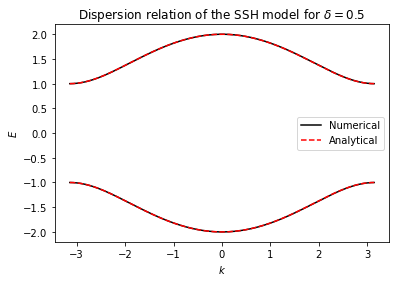

In [4]:
# Plot the numerical and analytical dispersion relations
plt.plot(k, numerical_upper_band_periodic, c = 'k', label = "Numerical")
plt.plot(k, numerical_lower_band_periodic, c = 'k')
plt.plot(k, analytical_upper_band, 'r--', label = "Analytical")
plt.plot(k, -analytical_upper_band, 'r--')
plt.legend()
plt.xlabel(r"$k$")
plt.ylabel(r"$E$")
plt.title("Dispersion relation of the SSH model for $\delta = {}$".format(delta))
print()

#### Question 4

For open boundary conditions, we follow the same steps, but the matrix $M_\text{open}$ no longer has elements in the bottom left and top right:

$$M_\text{open} = \begin{pmatrix}
0 & 1 - \delta &  &  &  &  & 0 \\
1 - \delta & 0 & 1 + \delta &  &  &  &  \\
 & 1+\delta & 0 & 1 - \delta &  &  &  \\
 &  & 1 - \delta & \ddots & \ddots &  & \\
 &  &  & \ddots & \ddots & 1 + \delta &  \\
 &  &  &  & 1 + \delta & 0 & 1-\delta \\
0 &  &  & &  & 1-\delta & 0
\end{pmatrix}$$

In [5]:
delta = 0.3
N = 1000

def construct_matrix_open(delta, N):
    """Construct the matrix M for open boundary conditions"""
    matrix_open = np.zeros((2*N, 2*N))
    i,j = np.indices((2*N, 2*N))

    # Fill the superdiagonal
    matrix_open[(j==(i+1)) & (i%2 == 0)] = 1 - delta
    matrix_open[(j==(i+1)) & (i%2 == 1)] = 1 + delta

    # Fill the subdiagonal
    matrix_open += matrix_open.T
    
    return matrix_open

print(construct_matrix_open(0.5, 5))

[[0.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  1.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  1.5 0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  1.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.5 0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  1.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.5 0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.  1.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  1.5 0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.5 0. ]]


We can take a look at how the spectrum differs between the open and periodic boundary conditions cases.

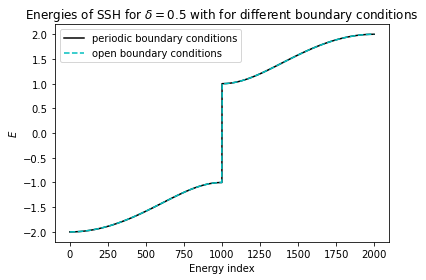

In [6]:
delta = 0.5
N = 1000

# Diagonalize the matrix M to get the eigenmodes for open and periodic boundary conditions
eigvals_periodic, eigvecs_periodic = np.linalg.eigh(construct_matrix_periodic(delta, N))
eigvals_open, eigvecs_open = np.linalg.eigh(construct_matrix_open(delta, N))

# Plot the numerical energies for open and periodic boundary condition, in increasing order
plt.plot(eigvals_periodic, 'k', label='periodic boundary conditions')
plt.plot(eigvals_open, 'c--', label='open boundary conditions')
plt.xlabel("Energy index")
plt.ylabel(r"$E$")
plt.title("Energies of SSH for $\delta = {}$ with for different boundary conditions".format(delta))
plt.legend()
print()

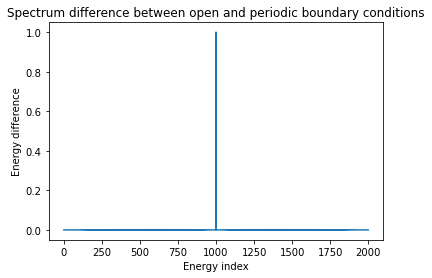

In [7]:
# Plot the energy difference between open and periodic boundary conditions when both are in increasing order
spectrum_difference = abs(eigvals_periodic - eigvals_open)
plt.plot(spectrum_difference)
plt.xlabel("Energy index")
plt.ylabel("Energy difference")
plt.title("Spectrum difference between open and periodic boundary conditions")
print("")

In [8]:
print("Indices where the energy difference is larger than 0.01:")
for k in np.nonzero(spectrum_difference > 0.01)[0]:
    print("Index: {}\tEnergy difference: {:.4}".format(k, spectrum_difference[k]))

Indices where the energy difference is larger than 0.01:
Index: 999	Energy difference: 1.0
Index: 1000	Energy difference: 1.0


#### Question 5

Now let us see what happens when we vary $\delta$ from -1 to 1. Here, we take $N=40$ so that the in-gap states are visible on the graph.

<IPython.core.display.Javascript object>


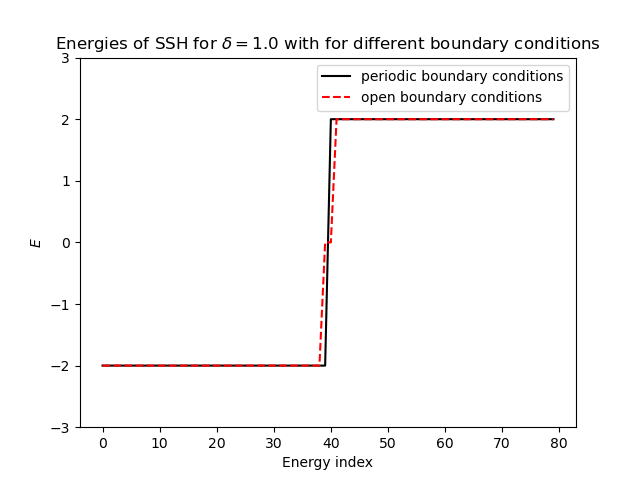

In [9]:
# Change the mode of matplotlib so that the animation works
%matplotlib notebook

# We vary delta from -1 to 1
delta_list = np.linspace(-1, 1, 100)
N = 40

fig, ax = plt.subplots()

# Define the two lines for periodic and open boundary conditions
line_periodic, = ax.plot(np.array(range(2*N)), np.zeros(2*N), 'k', label='periodic boundary conditions')
line_open, = ax.plot(np.array(range(2*N)), np.zeros(2*N), 'r--', label='open boundary conditions')

ax.set_xlabel("Energy index")
ax.set_ylabel(r"$E$")
ax.set_title("Energies of SSH for $\delta = {}$ with for different boundary conditions".format(delta_list[0]))
ax.legend()

ax.set_ylim(-3, 3)

def spectrum_update(k):
    """Update function for the animation of the spectrum as a function of delta"""

    # Diagonalize the matrix M to get the eigenmodes for open and periodic boundary conditions
    eigvals_periodic, eigvecs_periodic = np.linalg.eigh(construct_matrix_periodic(delta_list[k], N))
    eigvals_open, eigvecs_open = np.linalg.eigh(construct_matrix_open(delta_list[k], N))

    ax.set_title("Energies of SSH for $\delta = {:.2}$ with for different boundary conditions".format(delta_list[k]))
    
    # Update the lines
    line_periodic.set_ydata(eigvals_periodic)
    line_open.set_ydata(eigvals_open)
    
    return line_periodic, line_open

spectrum_update(0)

ani = FuncAnimation(fig, spectrum_update, interval=100, blit=True, save_count=50)

We see that we have no in-gap states for $\delta < 0$. When the gap closes when $\delta$ goes to $0$ and then open up again, two $0$ energy eigenmodes appear for $\delta > 0$.

#### Question 6

Let us look at the energy difference between the in-gap states as a function of $N$ for various $\delta$.

<IPython.core.display.Javascript object>


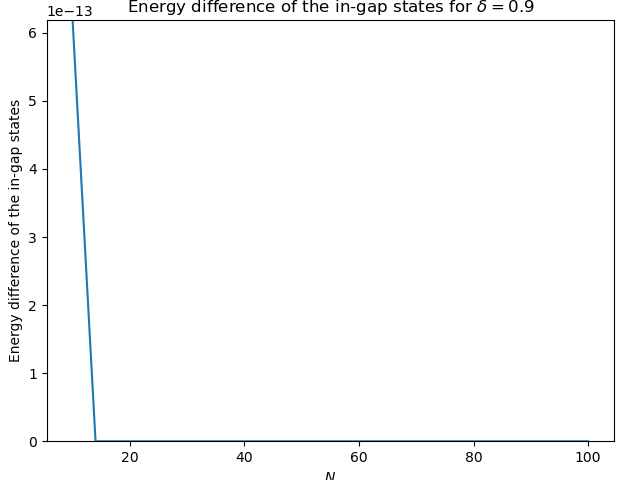

In [10]:
delta_list = np.linspace(0.1, 0.90, 30)
N_list = np.linspace(10, 100, 20, dtype=int)

fig, ax = plt.subplots()
plt.tight_layout()

line, = ax.plot(N_list, N_list)
ax.set_xlabel(r"$N$")
ax.set_ylabel("Energy difference of the in-gap states")
ax.set_title("Energy difference of the in-gap states for $\delta = {}$".format(delta_list[0]))
#ax.set_yscale("log")

def in_gap_spectrum_difference_update(k):
    """Update function for the animation of the in-gap states energy difference"""

    in_gap_difference_list = []

    for N in N_list:
        eigvals_open, eigvecs_open = np.linalg.eigh(construct_matrix_open(delta_list[k], N))
        in_gap_difference_list.append(eigvals_open[N] - eigvals_open[N-1])
    
    ax.set_title("Energy difference of the in-gap states for $\delta = {:.2}$".format(delta_list[k]))
    ax.set_ylim(min(in_gap_difference_list), max(in_gap_difference_list))
    
    # Update the line
    line.set_ydata(in_gap_difference_list)
    
    return line,

in_gap_spectrum_difference_update(0)

ani = FuncAnimation(fig, in_gap_spectrum_difference_update, interval=100, blit=True, save_count=50)

In [11]:
# Put matplotlib back into default mode
%matplotlib inline

We see that the energy difference between the in-gap states decreases exponentially fast as $N$ increases. Furthermore, it decreases even faster when $\delta$ is large.

Let us now take a look at the density of those in-gap states. Using fermionic anticommutation relations, we can show that the occupation of site $i$ for the mode $d_j$ is given by:

\begin{align}
\langle 0 | d_i c_j^\dagger c_j d_i^\dagger | 0 \rangle &= \sum_{kp} U_{ik} U_{ip}^* \langle 0 | c_k c_j^\dagger c_j c_p^\dagger | 0 \rangle \\
&= \sum_{kp} U_{ik} U_{ip}^* \delta_{jk} \delta_{jp} \\
&= |U_{ij}|^2
\end{align}

Since $U$ is the conjugate of the eigenvector matrix, the density of the state $d_i|0\rangle$ is therefore given by the modulus square of the coefficients of the $i$-th eigenvector.

Plotting the density distribution of in-gap states, we see that they are localized on either the left or right edges of the chain, with densities decaying exponentially fast.

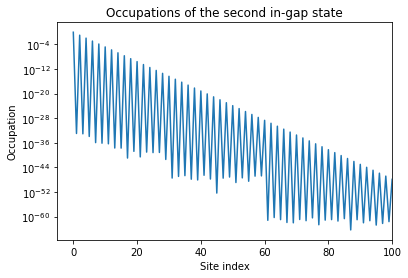

In [12]:
delta = 0.5
N = 1000

eigvals_open, eigvecs_open = np.linalg.eigh(construct_matrix_open(delta, N))

plt.plot(abs(eigvecs_open[:,N])**2)
plt.xlabel("Site index")
plt.ylabel("Occupation")
plt.title("Occupations of the second in-gap state")

plt.xlim(-5, 100)
plt.yscale("log")